In [60]:
import numpy as np
import pandas as pd 
import math 
import random
import os

from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')
%matplotlib inline

In [6]:
norm_rv = stats.norm(loc=0, scale=1)
norm_rv.ppf(0.025)

-1.9599639845400545

(-1.959963984540054, 1.959963984540054)

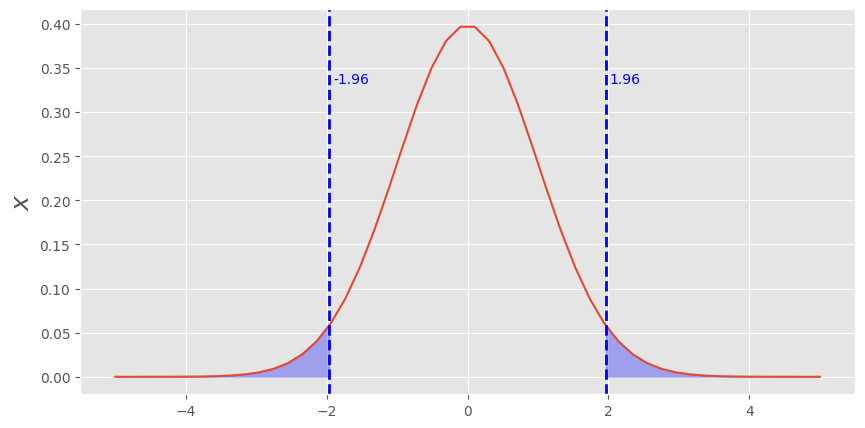

In [13]:
def norm_conf_int(alpha, mean_hat=0, std_hat=1, margin=5):
    plt.figure(figsize=(10,5))
    xs = np.linspace(mean_hat-margin, mean_hat + margin)
    pdf = stats.norm(mean_hat,std_hat).pdf(xs)

    plt.plot(xs,pdf)
    plt.ylabel('$f(x)$', fontsize=18)
    plt.ylabel('$x$', fontsize=18)

    left, right = stats.norm.interval(1-alpha,loc=mean_hat,scale=std_hat)

    for i in [left,right]:
        y_max = plt.ylim()[1]
        plt.axvline(i, color='blue', linestyle = 'dashed', lw=2)

        if i == left:
            xq = np.linspace(mean_hat - margin, left)
        else:
            xq = np.linspace(right, mean_hat + margin)
        text_margin = 0.05 
        plt.text(i + text_margin, 0.8*y_max, round(i,2), color='blue', fontsize = 10)
        yq = stats.norm(mean_hat, std_hat).pdf(xq)
        plt.fill_between(xq, 0, yq, color='blue', alpha=0.3)
    return left, right

alpha = 0.05
norm_conf_int(alpha=alpha)

In [43]:
random.seed(42)
x = np.random.randint(2,10,size=100)

In [44]:
lam_hat = np.mean(x)
lam_hat

6.2

In [45]:
norm_rv = stats.norm(loc=0, scale=1)

alpha = 0.05
z_alpha = norm_rv.ppf(1-alpha/2)

lam_hat = np.mean(x)
lam_se = np.sqrt(lam_hat/len(x))

lam_left = lam_hat - z_alpha * lam_se
lam_right = lam_hat + z_alpha * lam_se
f"[{lam_left}, {lam_right}] - widht: {lam_right - lam_left}"

'[4.656722815295205, 7.743277184704795] - widht: 3.0865543694095905'

(4.656722815295205, 7.743277184704795)

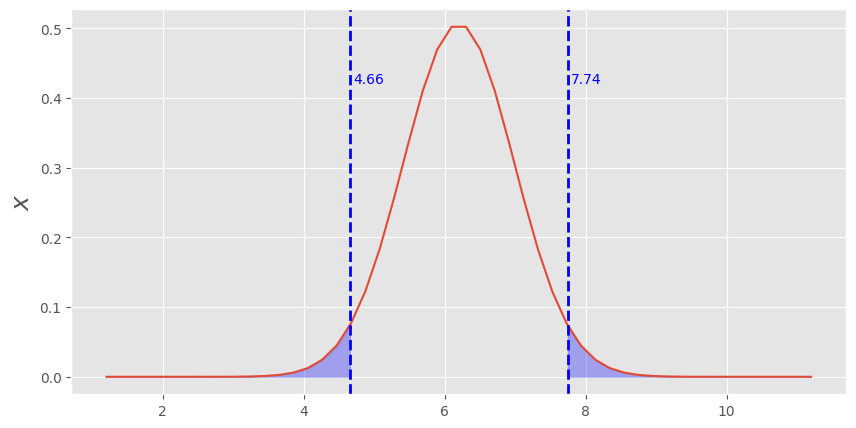

In [46]:
norm_conf_int(alpha, mean_hat=lam_hat, std_hat=lam_se)

In [96]:
y = np.random.randint(2,10,size=100)

In [97]:
diff = np.mean(x) - np.mean(y)
diff_se = np.sqrt(np.mean(x)/len(x) + np.mean(y)/len(y))

(-0.7686039480305782, 2.448603948030578)

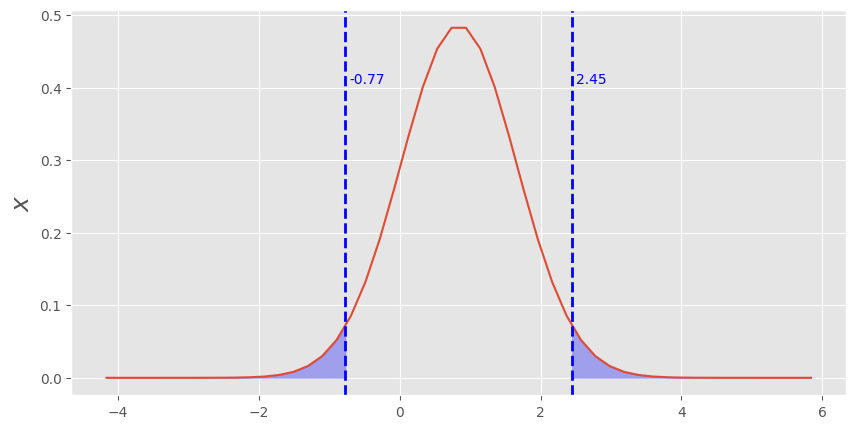

In [98]:
norm_conf_int(alpha, mean_hat=diff, std_hat=diff_se)